## 第一次课
1. 利用软件读取excel， 完成变量赋值，各个教学班级的分数统计(平均分，标准差)✔️
2. 比较各个教学班的教学效果，本次月考平均分与上学期末平均分的差距。✔️
3. 得出各个同学的各门课程的变化。统计各个教学班学生变化的平均值。✔️
4. 做一下2和3结果的直方图📊，每门课做一个。✔️


- 平均分 => 试卷难度
- 标准差 => 区分度

In [1]:
import pandas as pd
import openpyxl
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 144 #分辨率

In [2]:
IO = '月考成绩.xlsx'

wb = openpyxl.load_workbook(IO)
sheets = wb.get_sheet_names()
# df0 上学期末
# df1 第一次月考
times = ['上学期末','第一次月考','第二次月考','第三次月考']
df0 = pd.read_excel(io=IO,sheet_name=sheets[0])
df1 = pd.read_excel(io=IO,sheet_name=sheets[1])

/Users/hans/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated function get_sheet_names (Use wb.sheetnames).
  after removing the cwd from sys.path.


In [3]:
# df0

## 导入数据集并切分

In [4]:
N=9
# 六个教学班
types=df0.columns.tolist()

将N个教学班学科设置为 sub[0-N]

['生物班', '化学班', '物理班', '地理班', '历史班', '政治班'……]

In [5]:
subsClass=[]
subs=[]
for index in range(N):
#     locals()['sub'+str(index)] = types[index+1]
    subsClass.append(types[index+1])

In [6]:
subsClass

['生物班', '化学班', '物理班', '地理班', '历史班', '政治班', '语文班', '数学班', '英语班']

In [7]:
for sub in subsClass:
    subs.append(sub[0:2])
subs

['生物', '化学', '物理', '地理', '历史', '政治', '语文', '数学', '英语']

### 获取各个班级的平均分
xuekeAve

 grouped = df0.groupby(df0['生物班'])
 
 grouped['生物'].mean()

In [8]:
# 班级分租
Groups0=[]
Groups1=[]
for index,sub in enumerate(types[1:1+N]):
    group_=df0.groupby(df0[sub])[subs[index]]
    Groups0.append(group_)
    
    group_=df1.groupby(df1[sub])[subs[index]]
    Groups1.append(group_)

In [9]:
# 班级平均分
    
# 期末各学科成绩
banjiAve0=[]
# 第一次月考各学科成绩
banjiAve1=[]
# 两次成绩的变化、差距
banjiVary=[]
banjiVaryAve=[]
for index,sub in enumerate(types[1:1+N]):
    ave0=Groups0[index].mean()
    banjiAve0.append(ave0)
    
    ave1=Groups1[index].mean()
    banjiAve1.append(ave1)
    
    banjiVary.append(ave1-ave0)
    
    banjiVaryAve.append((ave1-ave0).mean())
# banjiAve0
# banjiAve1
# banjiVary
# banjiVaryAve

In [10]:
banjiVaryAveDic = pd.DataFrame(banjiVaryAve, columns=['教学班学生变化的平均值'], index=subs)
banjiVaryAveDic

,教学班学生变化的平均值
生物,-4.494035
化学,14.368338
物理,-12.273579
地理,5.954416
历史,1.975339
政治,1.012625
语文,7.225816
数学,-17.518379
英语,-3.743339


### 获取各个班级的标准差
banjiStd

In [11]:
# 班级标准差
# 期末各学科成绩
banjiStd0=[]
# 第一次月考各学科成绩
banjiStd1=[]
for index,sub in enumerate(types[1:1+N]):
    std_=Groups0[index].std()
    banjiStd0.append(std_)
    
    std_=Groups1[index].std()
    banjiStd1.append(std_)

# banjiStd0
# banjiStd1

### 2,3题的直方图

比较各个教学班的教学效果，本次月考平均分与上学期末平均分的差距。

In [12]:
times[3]

'第三次月考'

In [13]:
def pltBar(groupList, times, title=''):
    for index,sub in enumerate(types[1:1+N]):
        x =list(range(len(groupList[0][index])))
        for i in range(len(groupList)):
            groupList_ = groupList[i]
            name_list = groupList_[index].index
            num_list = groupList_[index]

            total_width, n = 0.8, len(groupList)
            width = total_width / n
            plt.bar(x, num_list, width=width, label=times[i], alpha = 0.4)
            for j in range(len(x)):
                x[j] = x[j] + width
        plt.title(subs[index]+'各班考试成绩'+title)
        plt.ylabel(title)
        plt.tick_params(top='off', right='off')
        plt.xticks(list(range(len(groupList[0][index]))), name_list, rotation = 90)#显示横坐标
        plt.legend()
        plt.show()

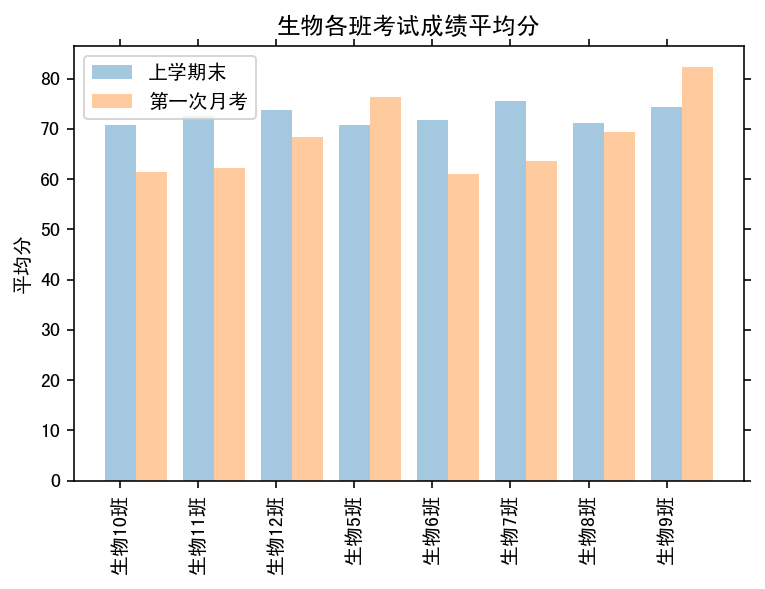

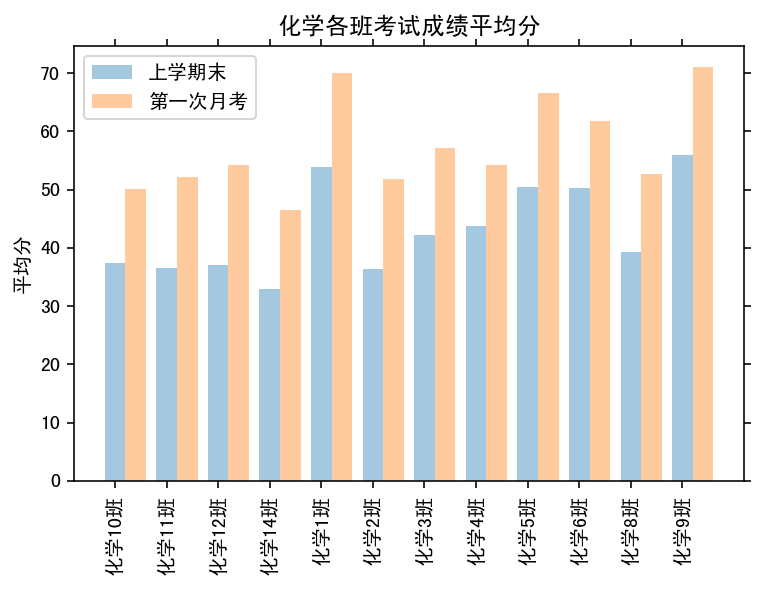

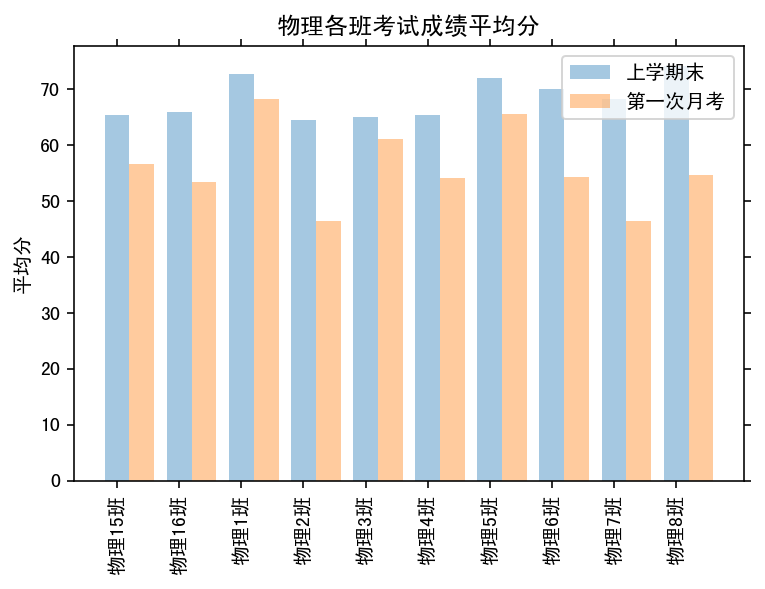

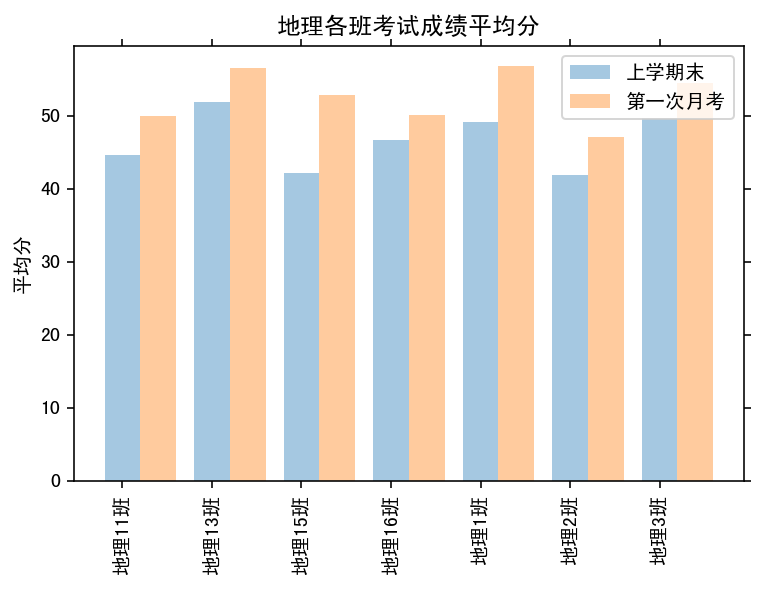

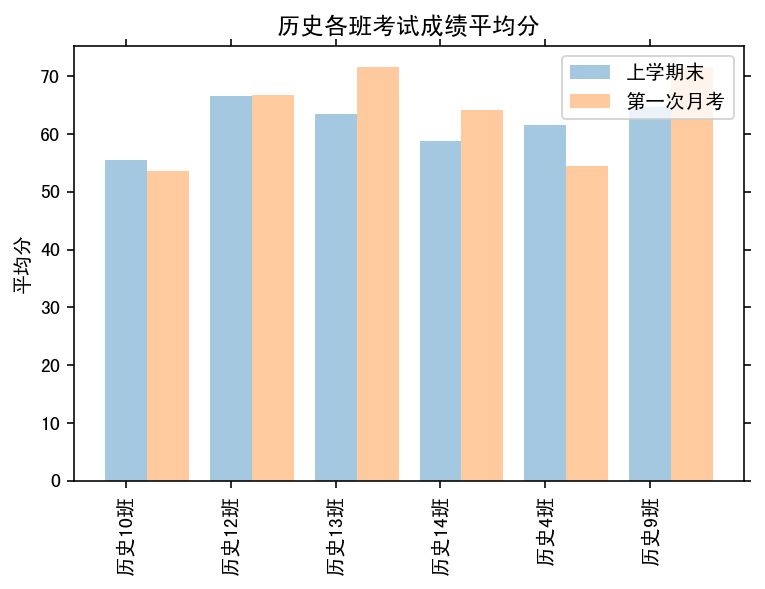

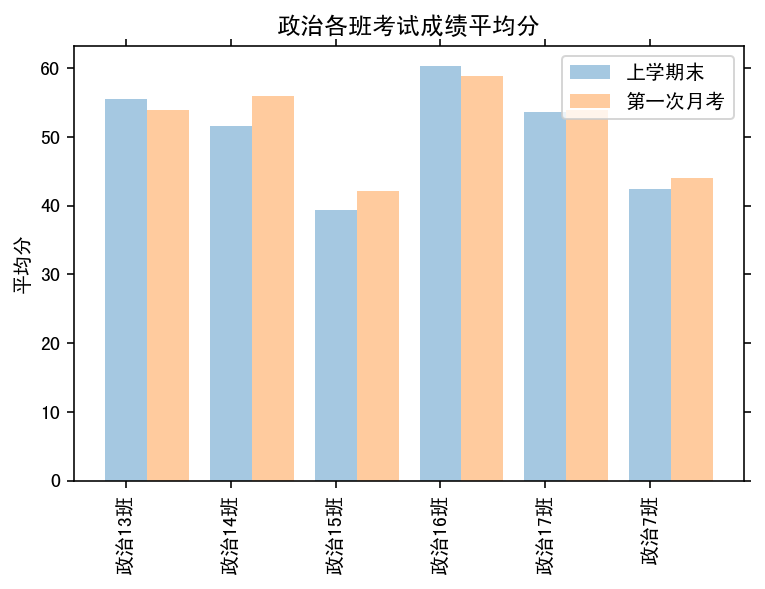

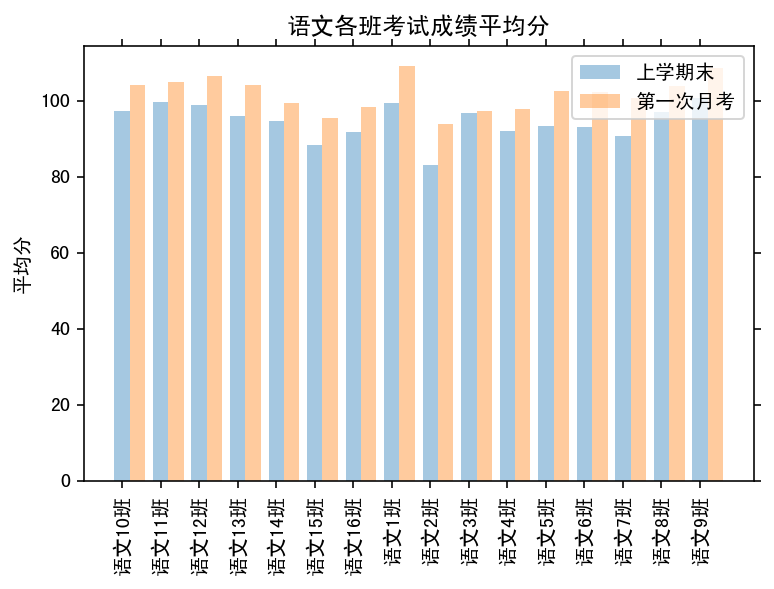

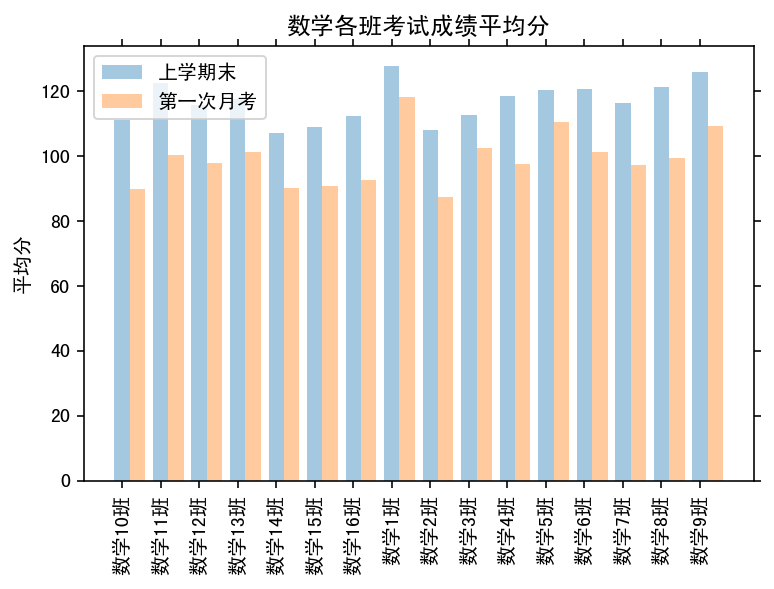

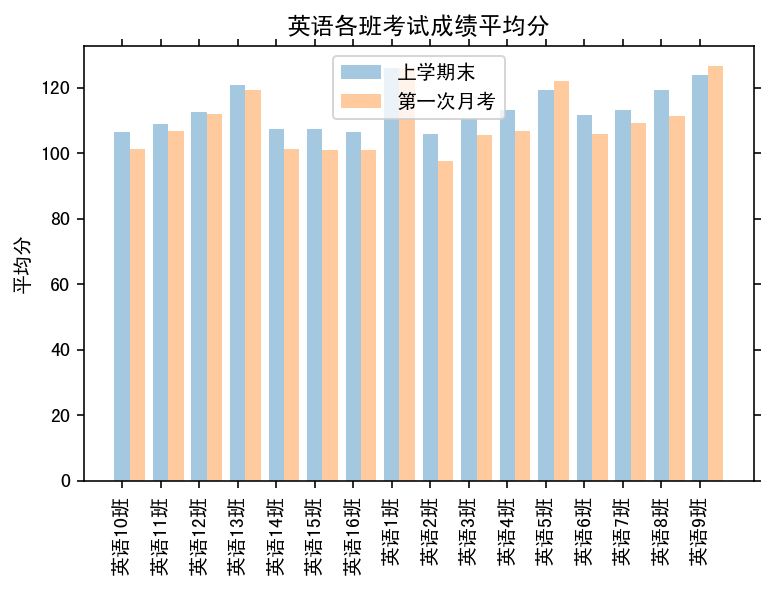

In [14]:
pltBar([banjiAve0,banjiAve1],times, title='平均分')

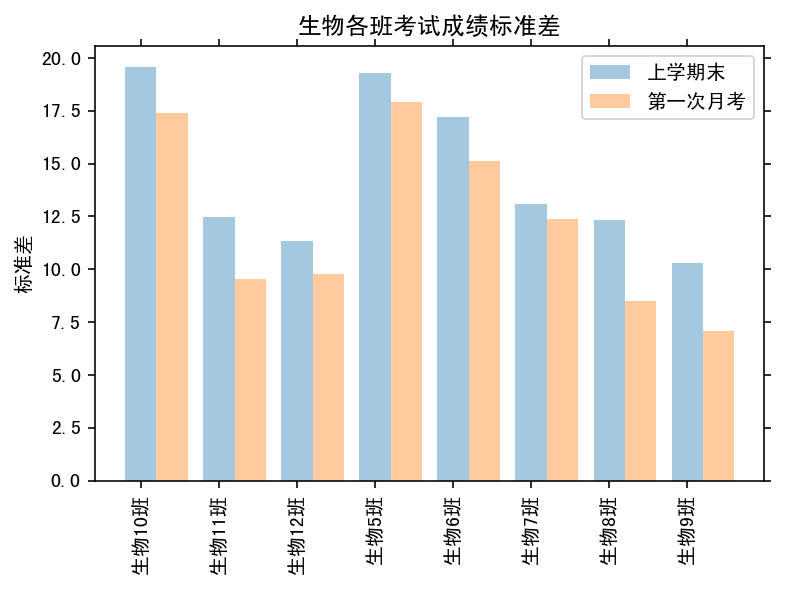

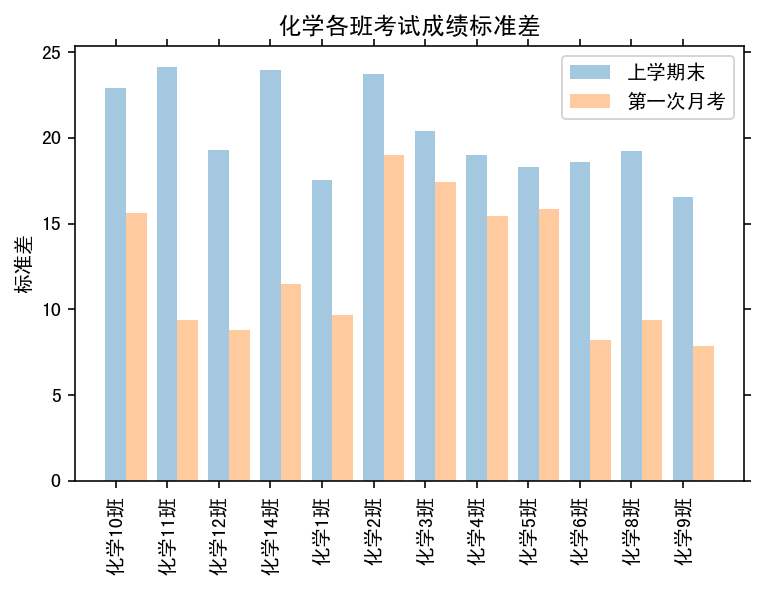

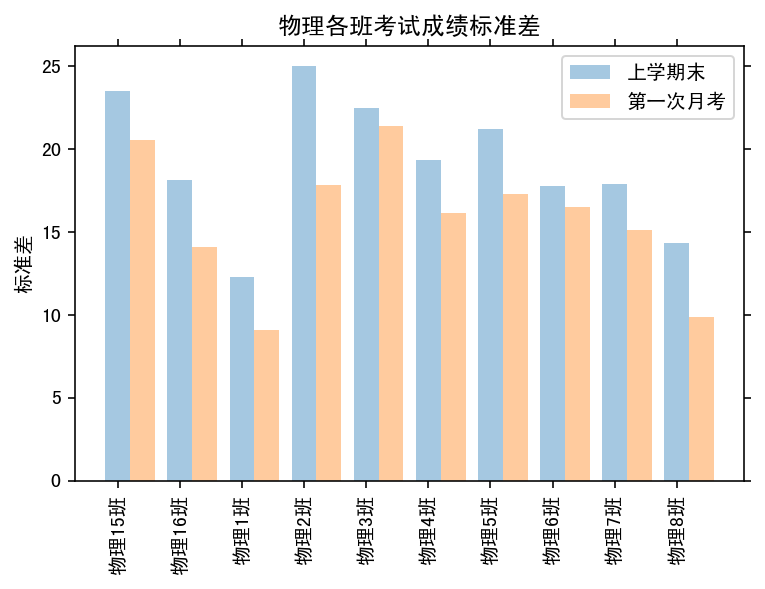

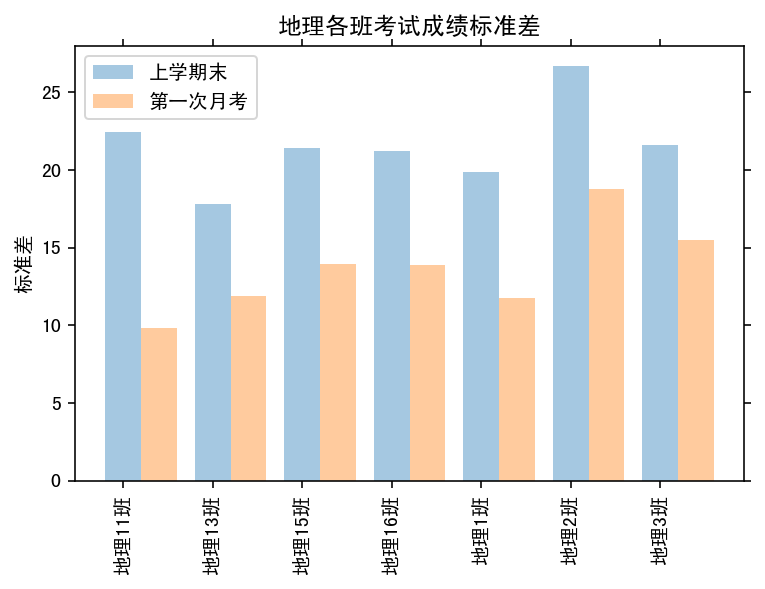

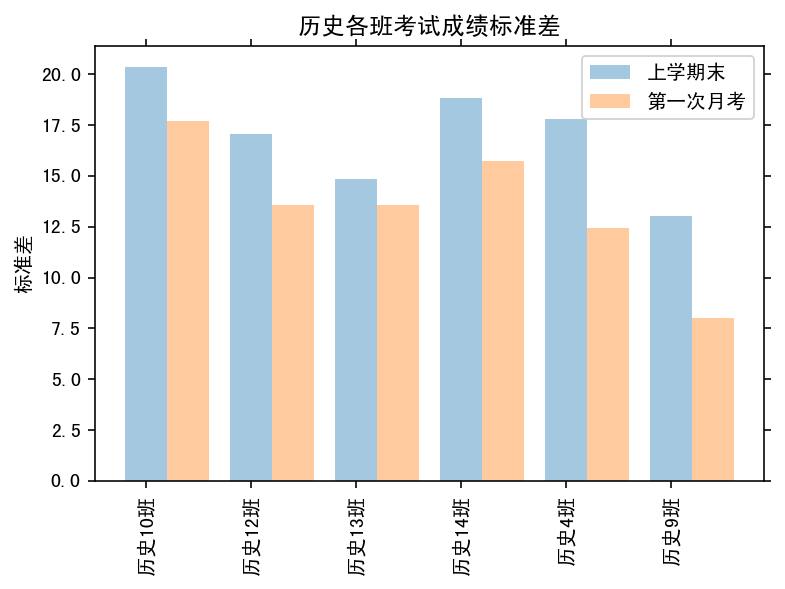

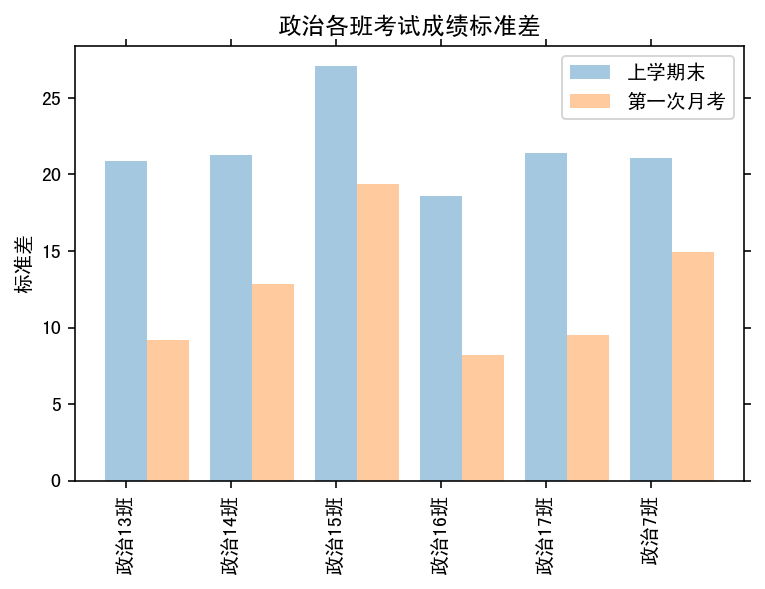

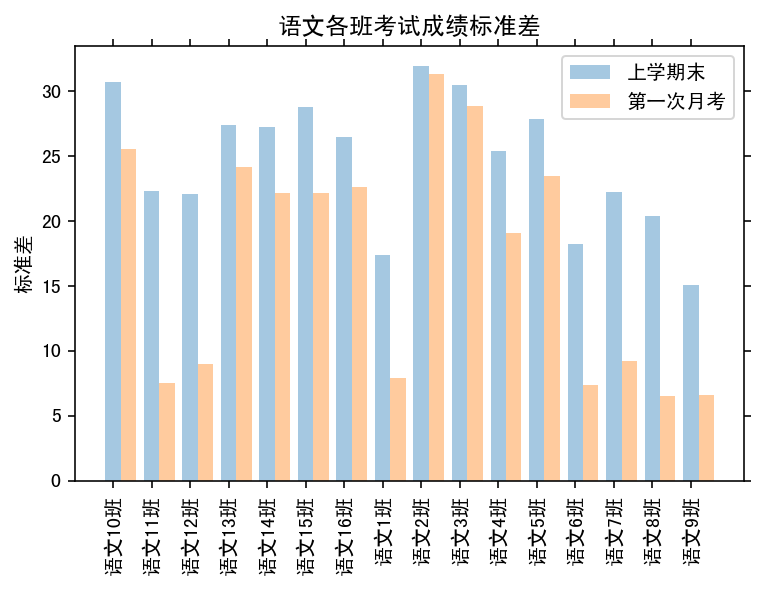

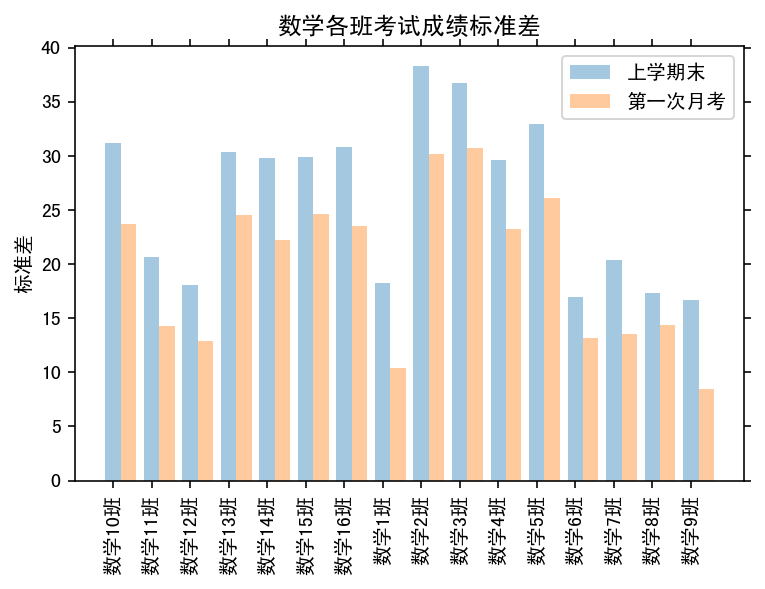

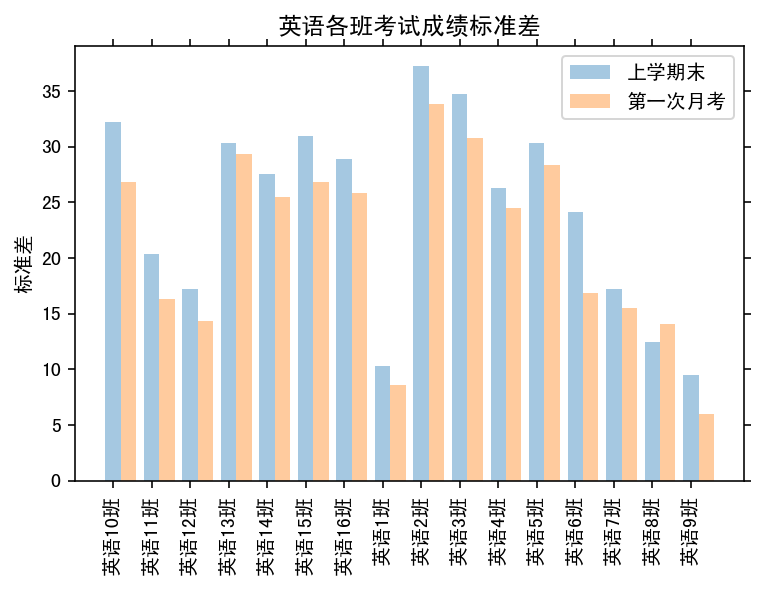

In [15]:
pltBar([banjiStd0,banjiStd1], times, '标准差')

得出各个同学的各门课程的变化。统计各个教学班学生变化的平均值。

/Users/hans/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/hans/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


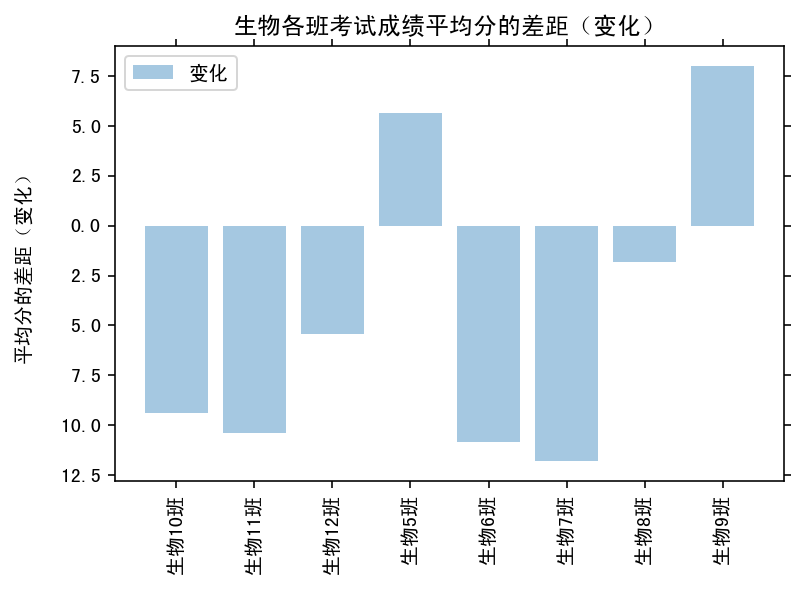

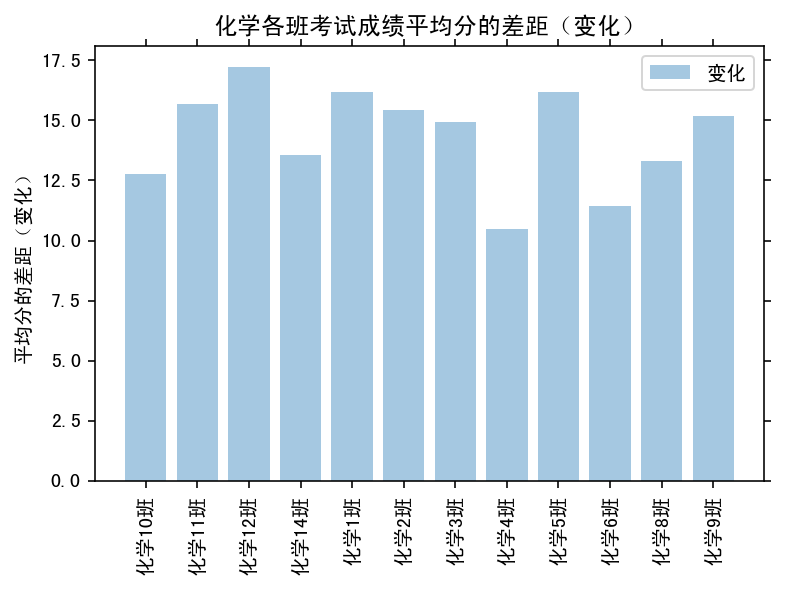

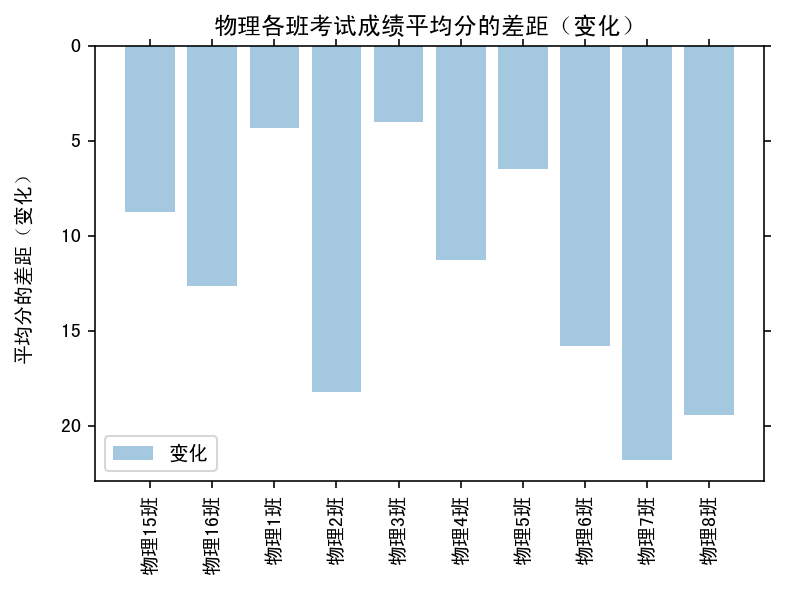

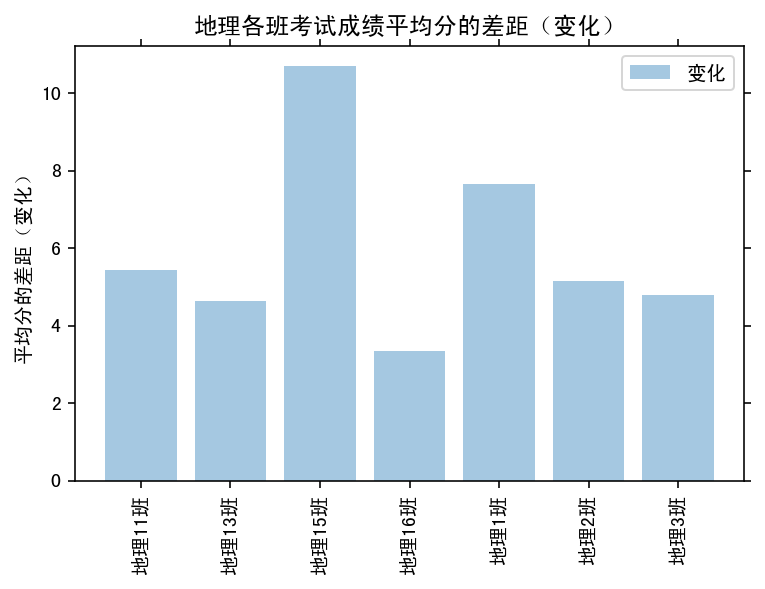

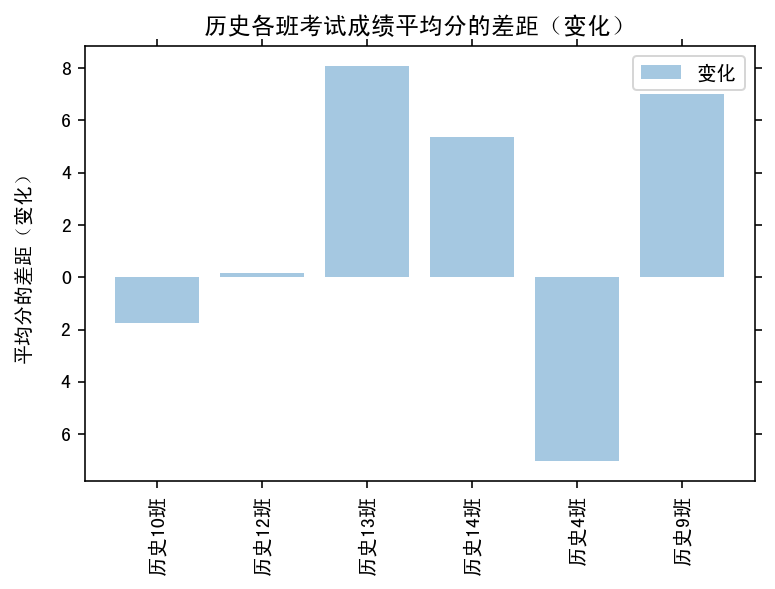

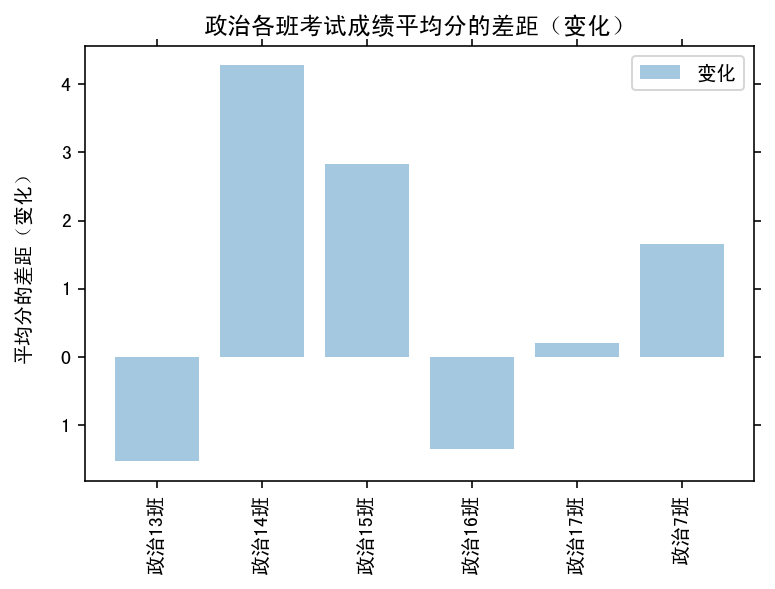

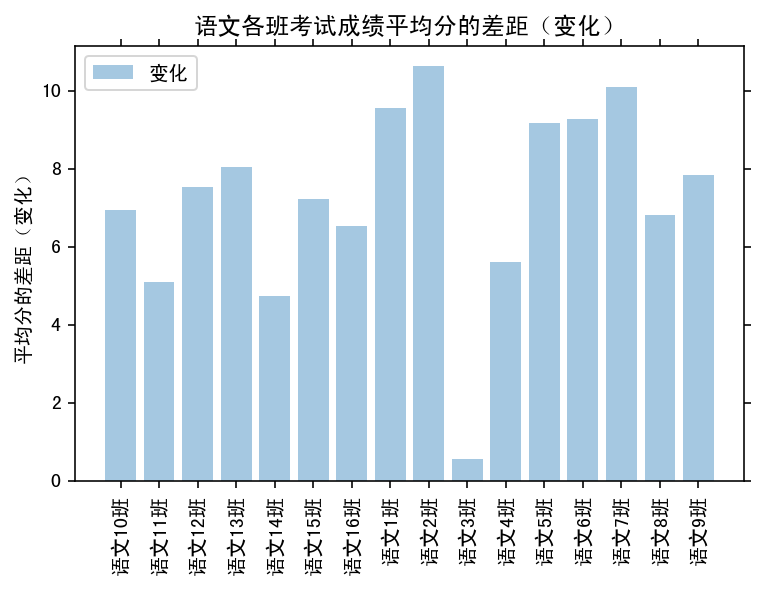

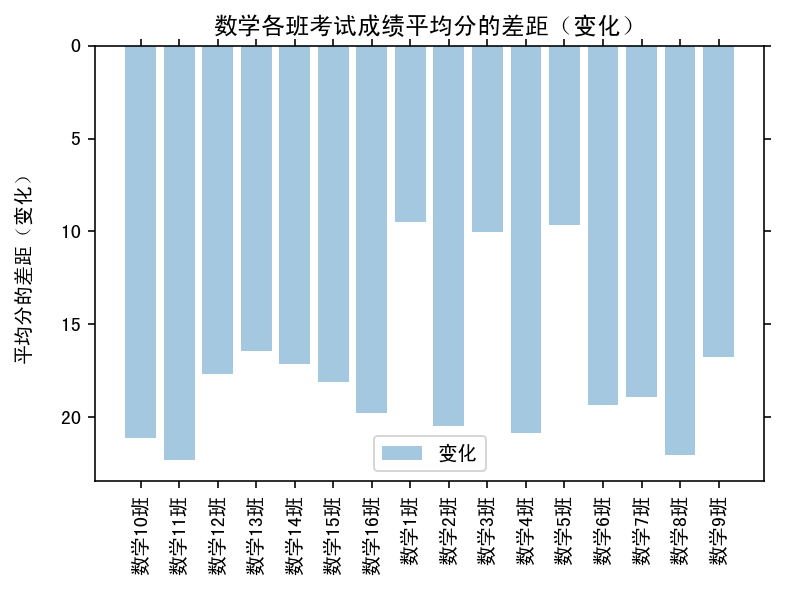

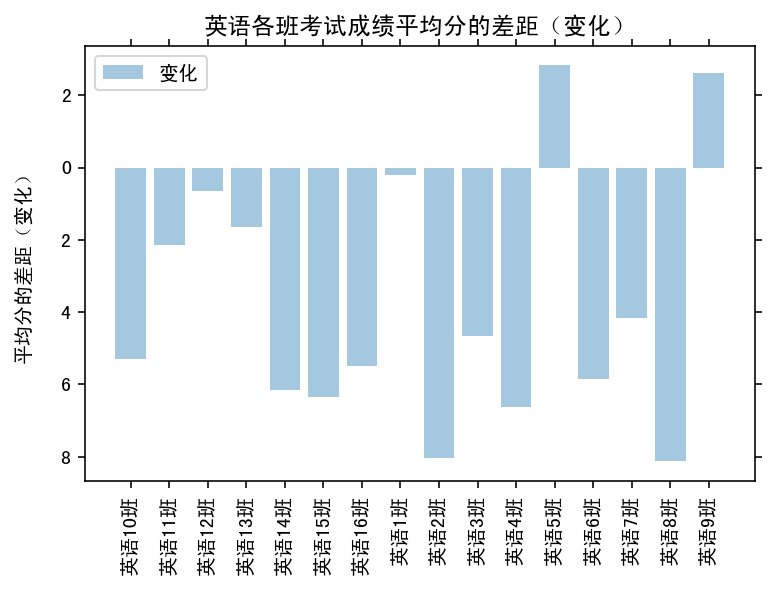

In [16]:
pltBar([banjiVary],['变化'], '平均分的差距（变化）')

## 第二次课
1. 分数标准化：消除不同试卷之间的难度，区分度的差距
2. 利用标准分进行比较
3. 每个科目，每个班两次考试之间的比较，画柱状图📊
4. 每个图像标准分变化，画柱状图


- 标准化公式：
![标准化公式](https://image.hansking.cn/uPic/202006/g9Rx1i.png)

In [17]:
# 标准化函数
def ZscoreStd(x):
    """Z-score normaliaztion"""
    x = (x - np.mean(x)) / np.std(x)
    return x

In [18]:
# 分数标准化
banjiZscoreStd0=[]
banjiZscoreStd1=[]
for index,sub in enumerate(types[1:1+N]):
    ZscoreStd_=ZscoreStd(banjiAve0[index])
    banjiZscoreStd0.append(ZscoreStd_)
    
    ZscoreStd_=ZscoreStd(banjiAve1[index])
    banjiZscoreStd1.append(ZscoreStd_)

In [19]:
# banjiZscoreStd0

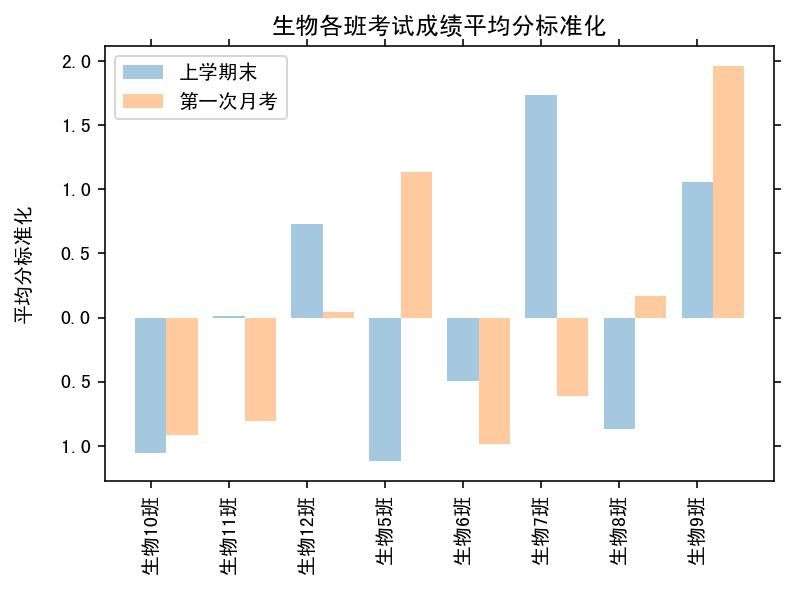

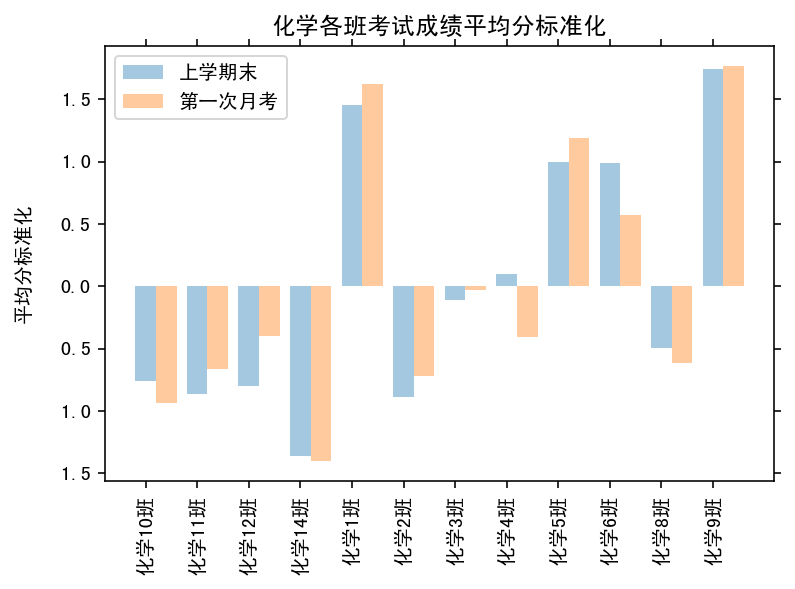

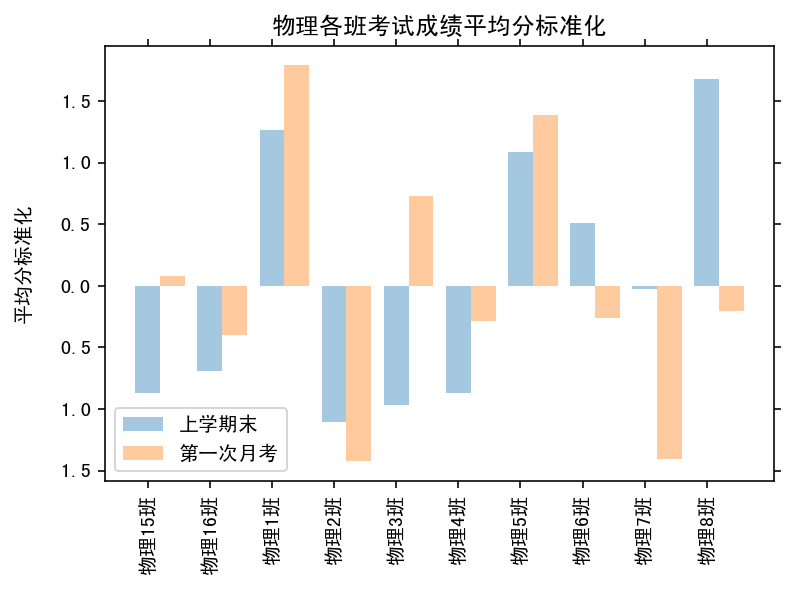

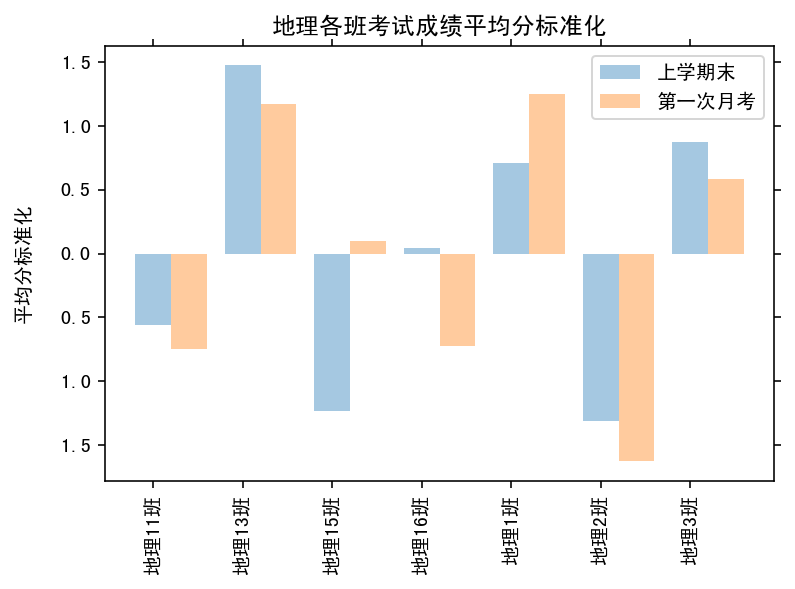

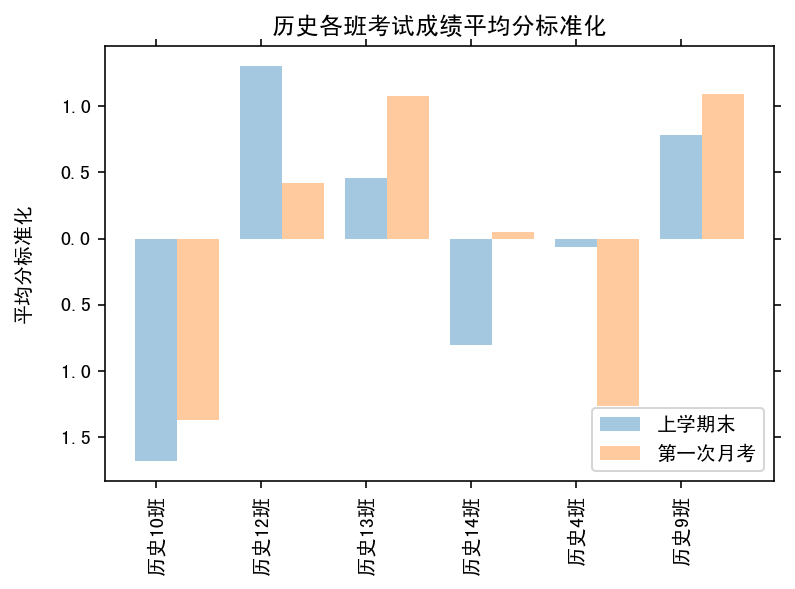

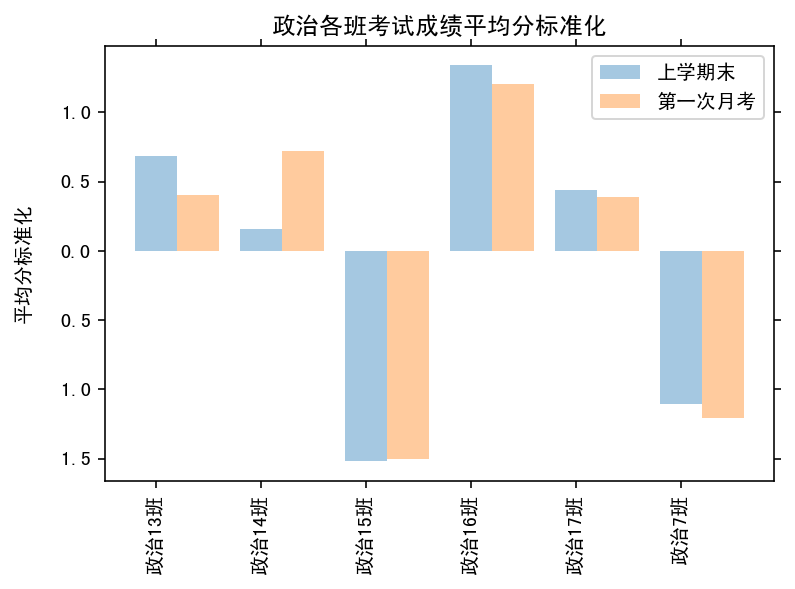

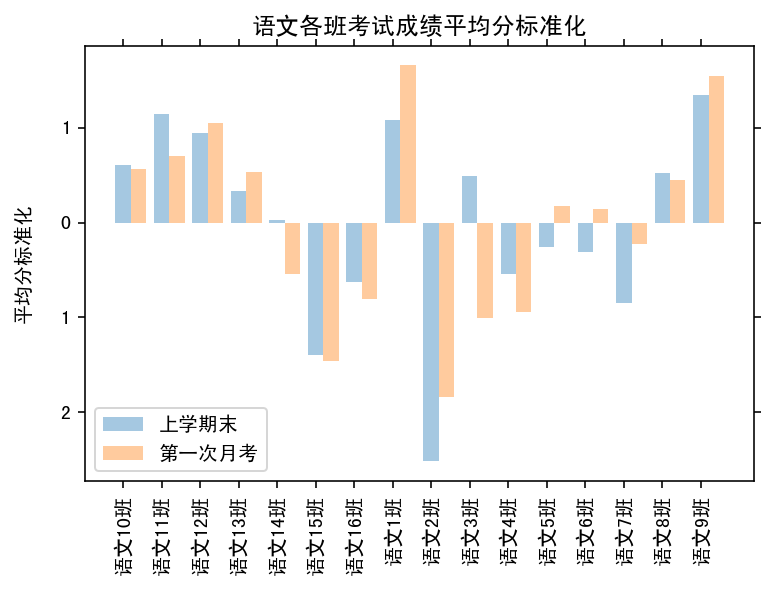

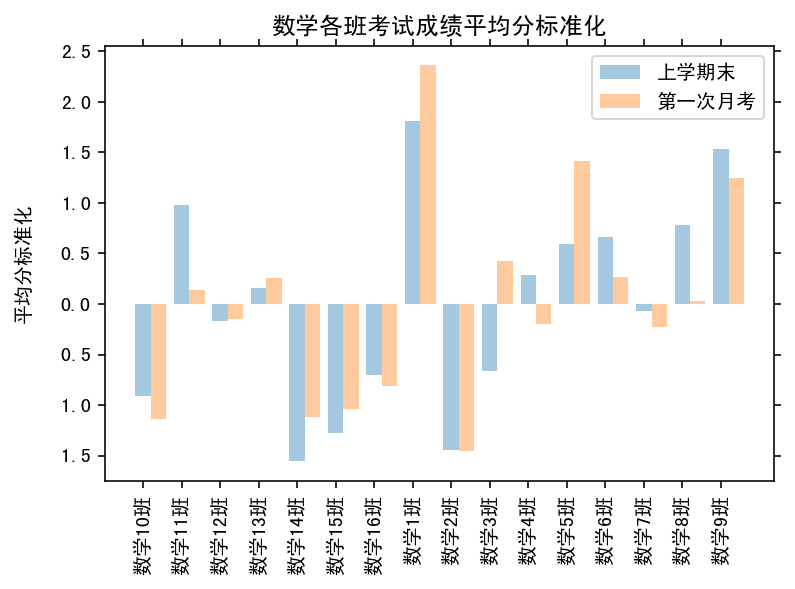

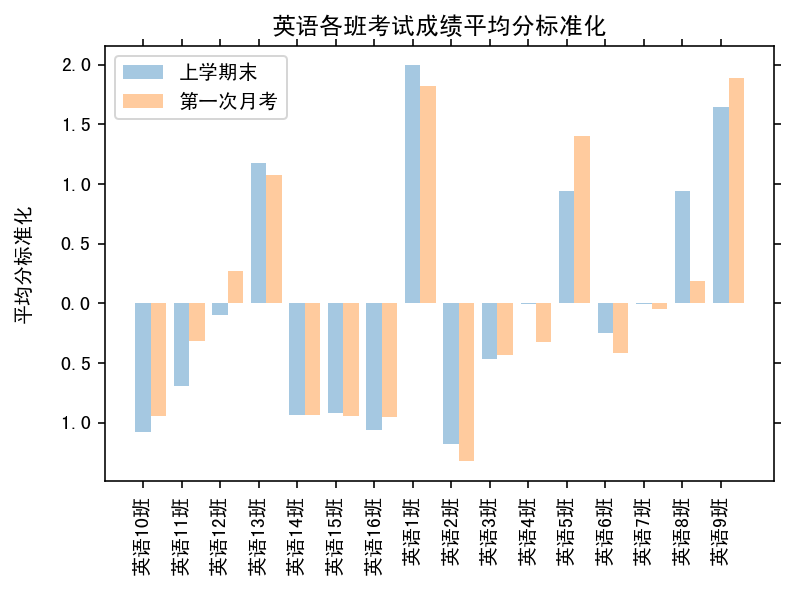

In [20]:
pltBar([banjiZscoreStd0,banjiZscoreStd1], times, title='平均分标准化')

## 第三次课

- 标准化后的数据在0附近不易分析


1. 进行规范化：把每个同学标准化之后的分数，转化为以75为平均值，5为标准差的分数
2. 比较规范化之后的变化，画出相应柱状图📊

In [21]:
def ZscoreNorm(x):
    """Z-score normaliaztion"""
    x = ((x - np.mean(x))*5 / np.std(x))+75
    return x

In [22]:
# 分数规范化
banjiZscoreNorm0=[]
banjiZscoreNorm1=[]
for index,sub in enumerate(types[1:1+N]):
    ZscoreNorm_=ZscoreNorm(banjiAve0[index])
    banjiZscoreNorm0.append(ZscoreNorm_)

    ZscoreNorm_=ZscoreNorm(banjiAve1[index])
    banjiZscoreNorm1.append(ZscoreNorm_)

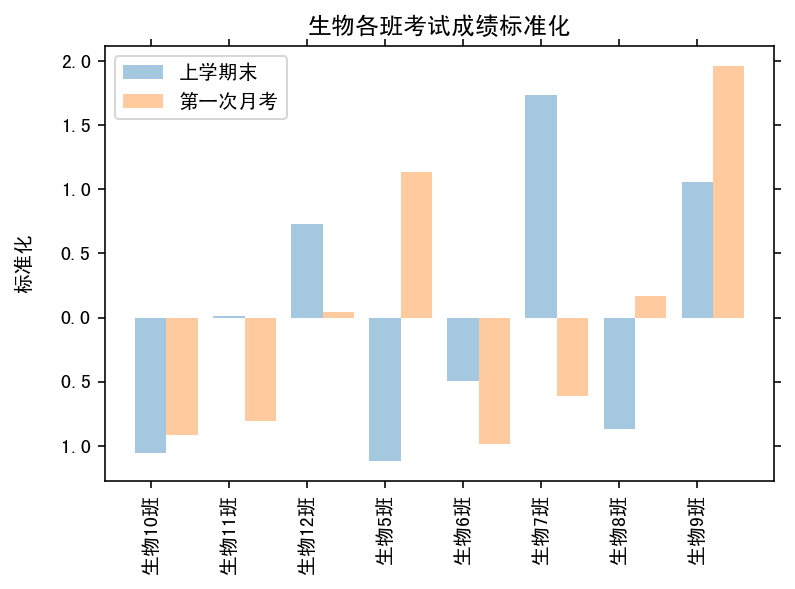

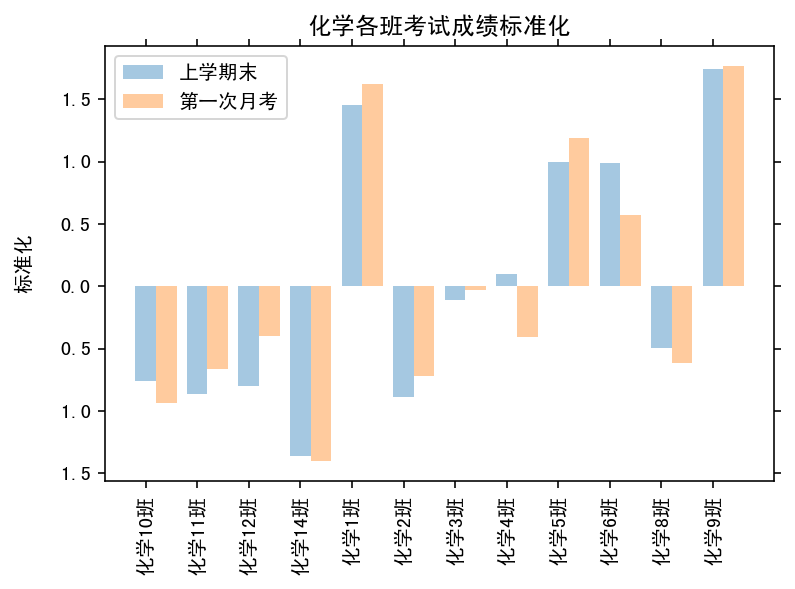

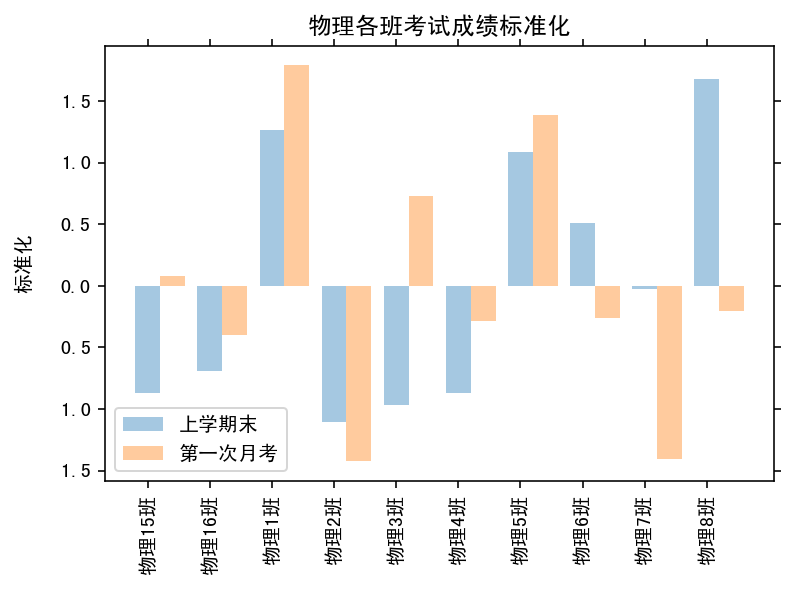

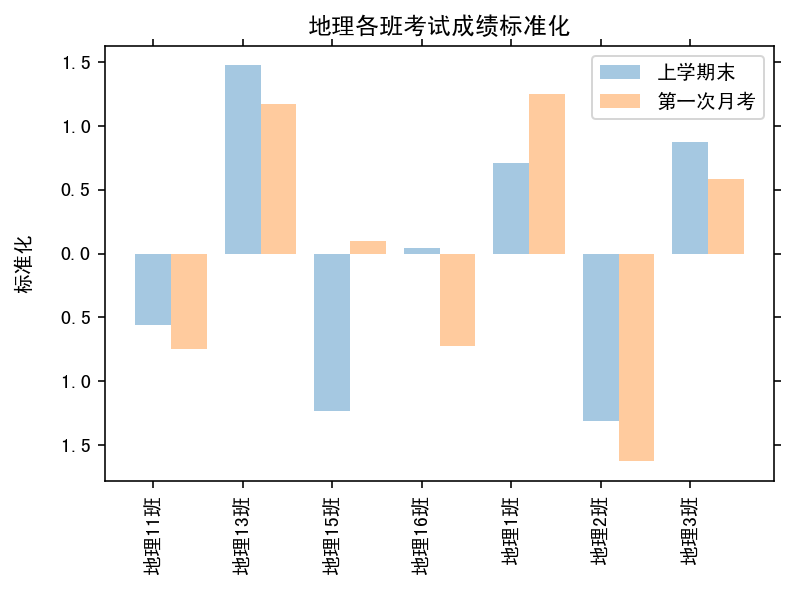

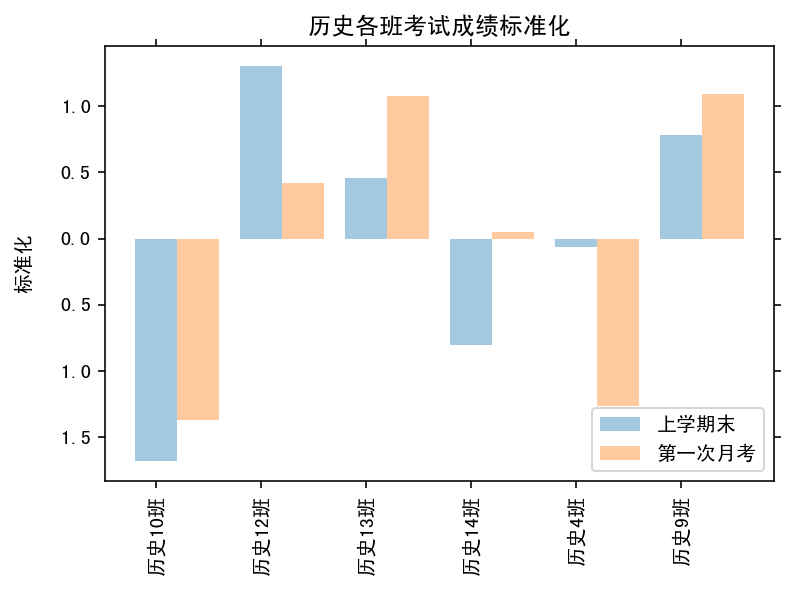

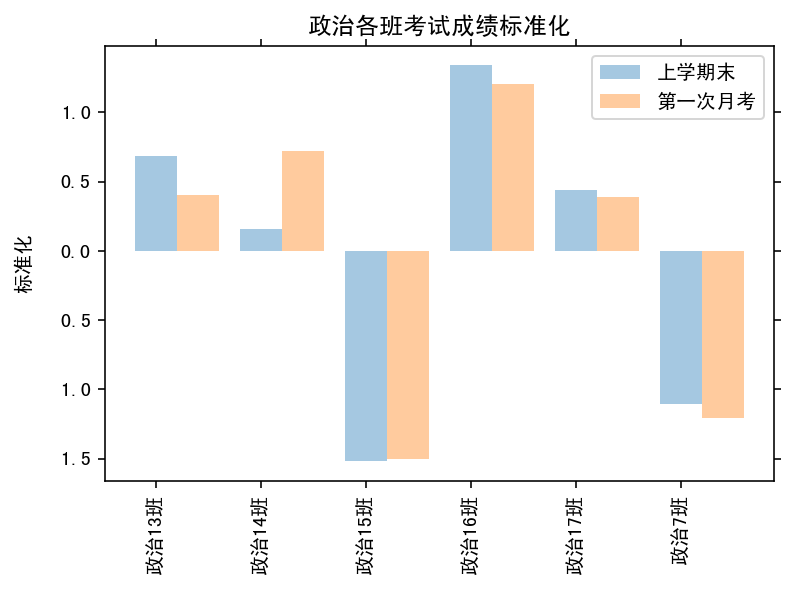

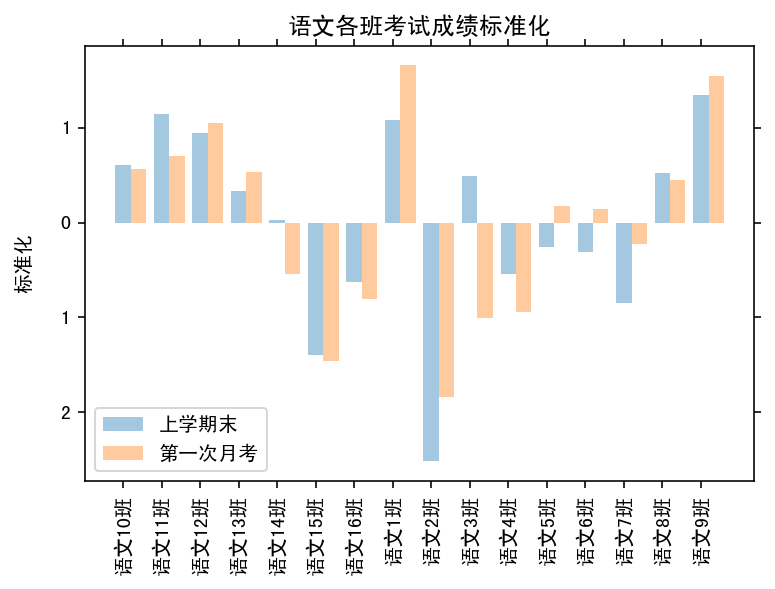

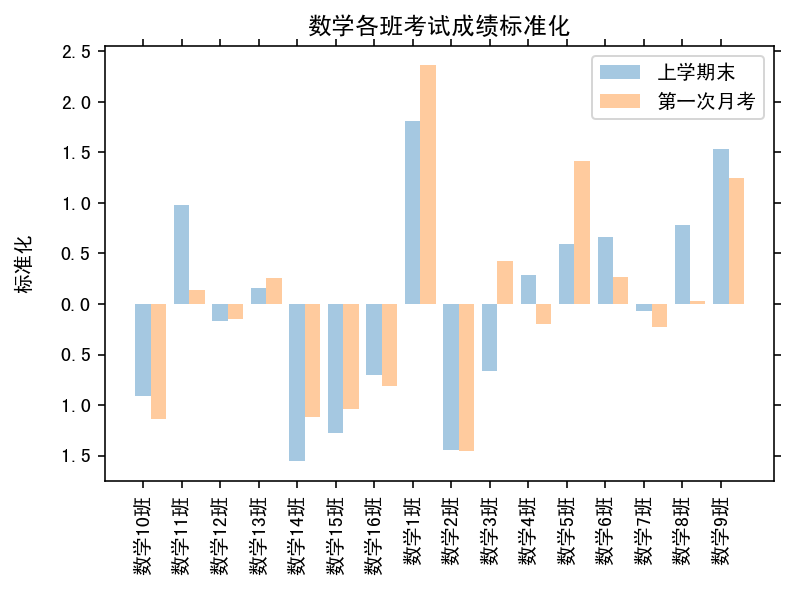

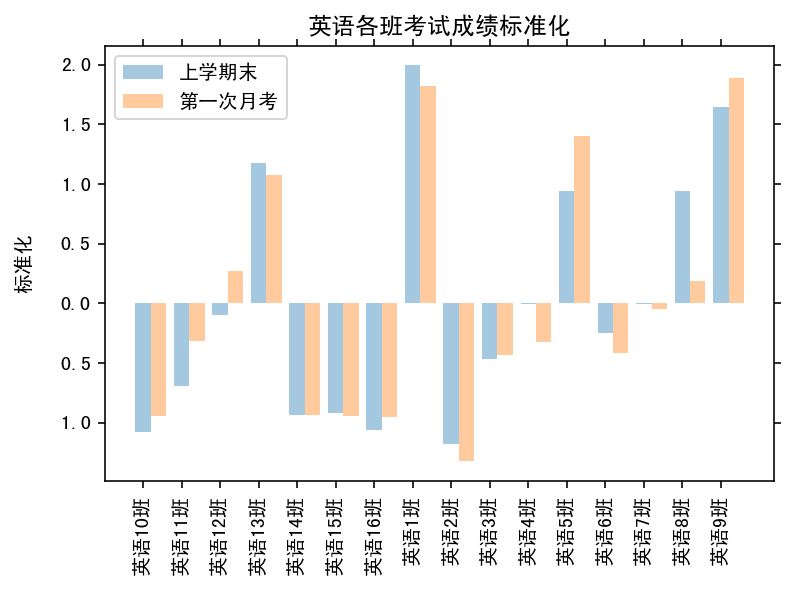

In [23]:
pltBar([banjiZscoreStd0, banjiZscoreStd1],times, title='标准化')

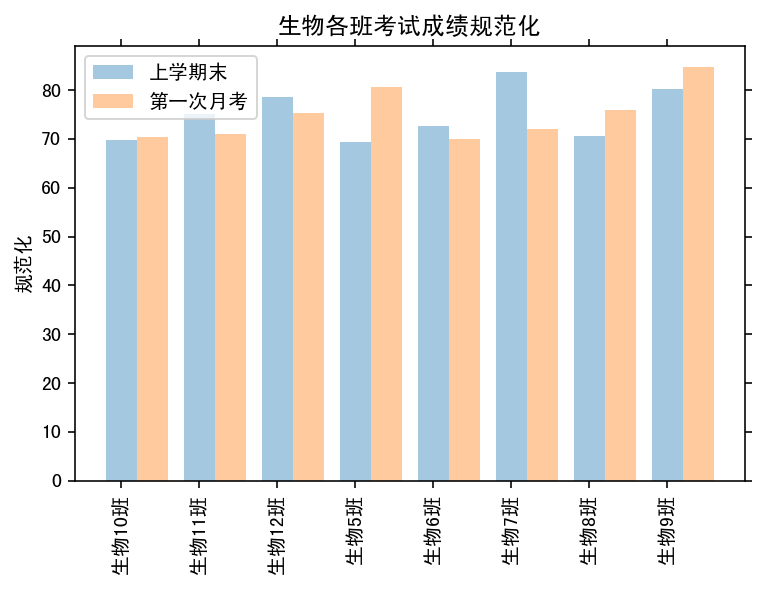

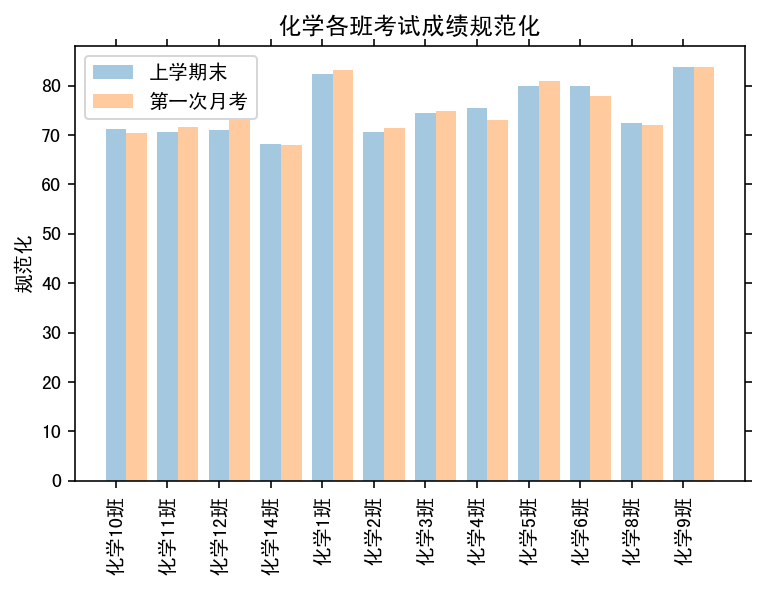

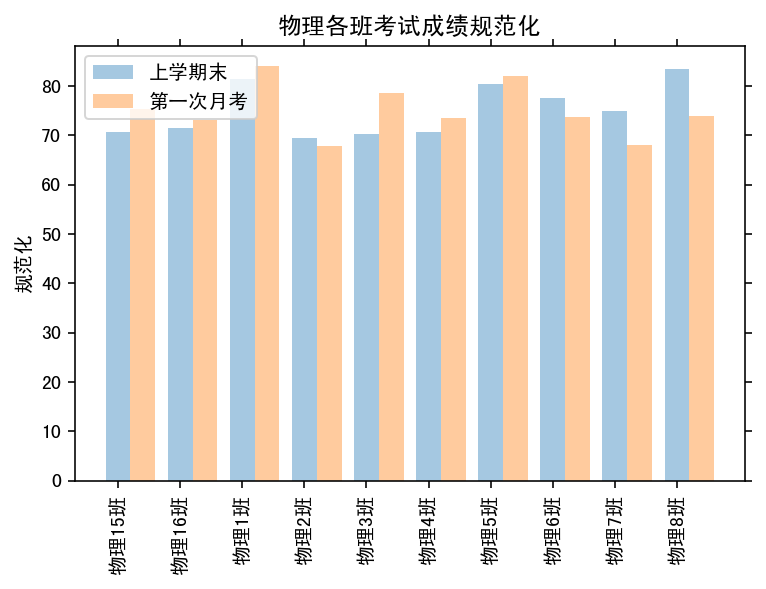

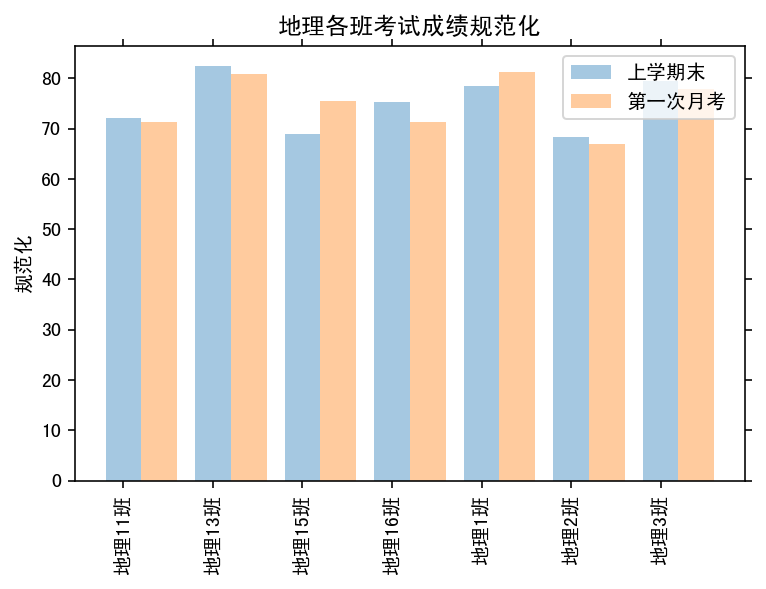

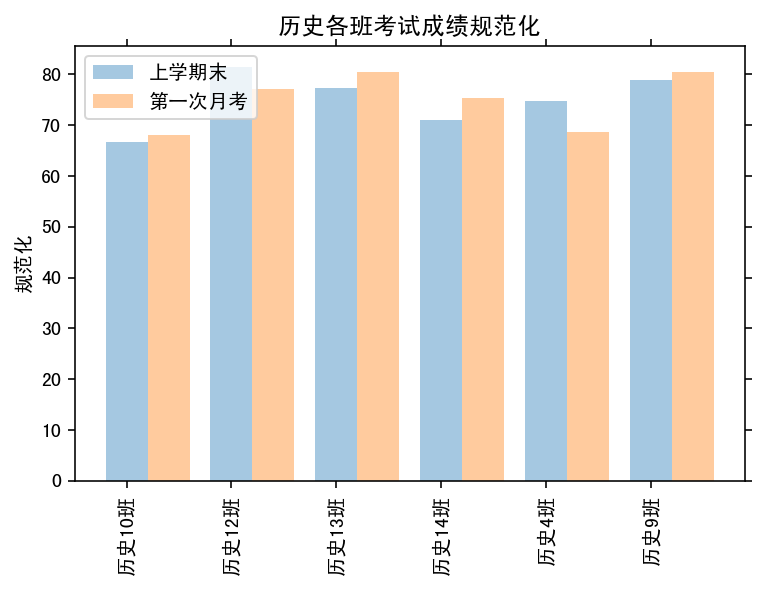

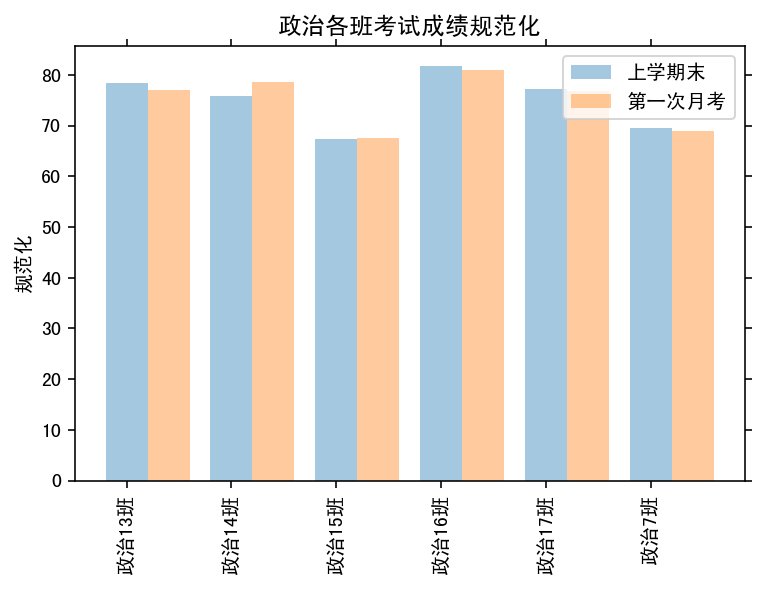

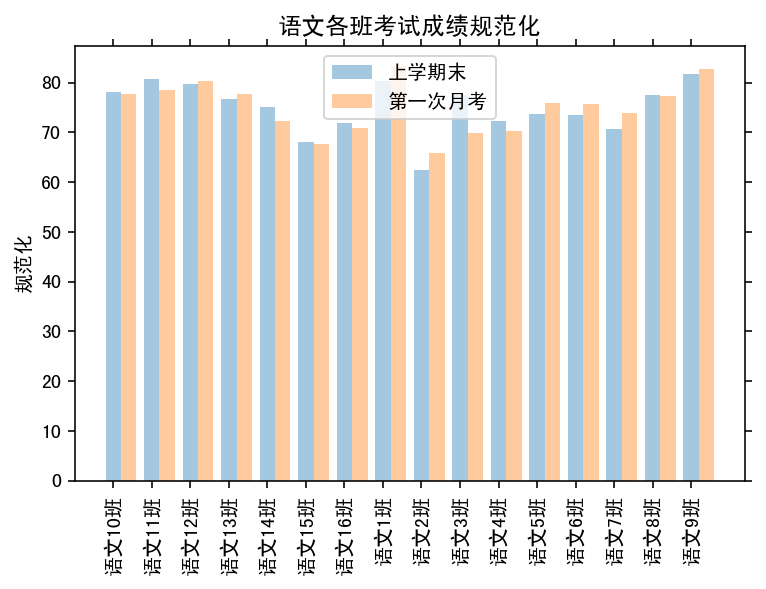

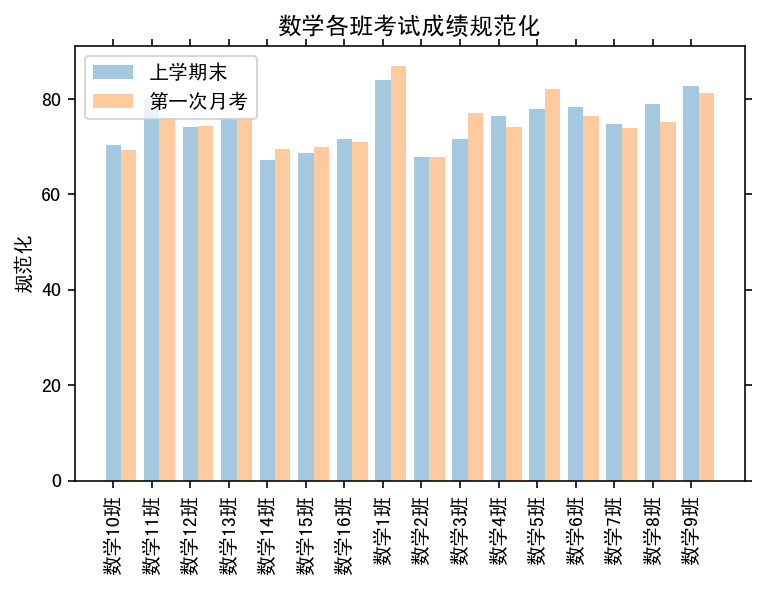

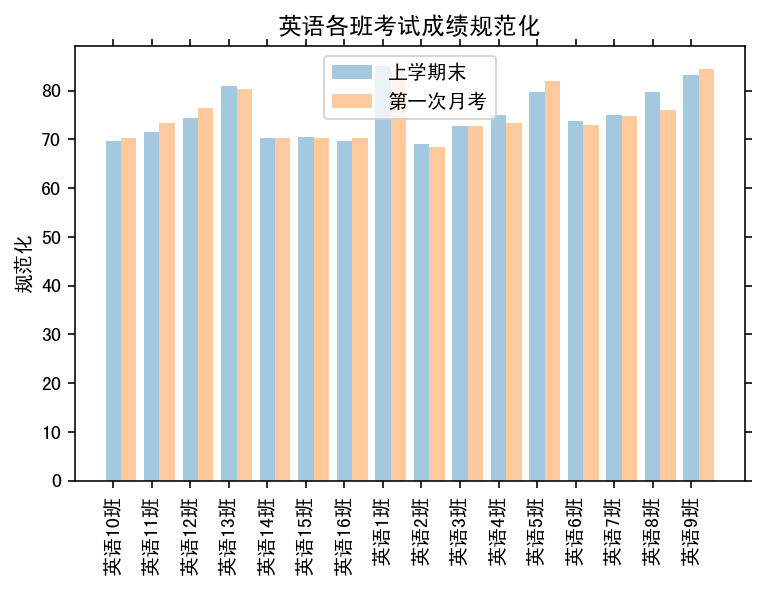

In [24]:
pltBar([banjiZscoreNorm0, banjiZscoreNorm1],times, title='规范化')

### 计算每一个行政班内所有学生、所有科目的有效标准分的均值

![u3KYsL](https://image.hansking.cn/uPic/202006/u3KYsL.png)

In [25]:
df0

,学籍号,生物班,化学班,物理班,地理班,历史班,政治班,语文班,数学班,英语班,语文,数学,英语,物理,化学,生物,政治,历史,地理
0,1701013004,NaN,NaN,NaN,地理15班,历史13班,政治13班,语文15班,数学15班,英语15班,111,101,136,-1,-1,-1,63,71,81
1,1701012101,生物5班,NaN,物理5班,地理3班,NaN,NaN,语文5班,数学5班,英语5班,126,105,125,83,-1,73,-1,-1,80
2,1701021921,NaN,化学3班,物理3班,地理2班,NaN,NaN,语文3班,数学3班,英语3班,127,107,141,68,53,-1,-1,-1,80
3,1701013034,NaN,NaN,物理15班,地理16班,历史9班,NaN,语文16班,数学16班,英语16班,100,70,91,62,-1,-1,-1,39,80
4,1701013022,NaN,NaN,物理15班,地理16班,NaN,政治15班,语文16班,数学16班,英语16班,118,106,105,73,-1,-1,54,-1,79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
657,1801010435,NaN,化学2班,物理2班,NaN,NaN,政治15班,语文2班,数学2班,英语2班,-1,-1,-1,-1,-1,-1,-1,-1,-1
658,1801011549,NaN,NaN,NaN,地理15班,历史10班,政治7班,语文15班,数学15班,英语15班,-1,-1,-1,-1,-1,-1,-1,-1,-1
659,1801021648,NaN,NaN,NaN,地理16班,历史10班,政治7班,语文16班,数学16班,英语16班,-1,-1,-1,-1,-1,-1,-1,-1,-1
660,1701022131,生物6班,NaN,物理6班,NaN,NaN,政治7班,语文6班,数学6班,英语6班,84,106,139,53,-1,95,-2,-1,-1


In [55]:
df0.groupby('语文班')[subs]